In [1]:
import sys
sys.path.append('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/')

In [2]:
import os 
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Hyperparam_Testing.Testing_Notebooks.Common_Functions as cf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 

from keras.regularizers import l2
from Hyperparam_Testing.Testing_Notebooks import chirallag as cL

import matplotlib
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'text.usetex': True})
matplotlib.rcParams.update({'text.usetex': True})
matplotlib.rcParams.update({'mathtext.fontset': 'cm'})
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [3]:
#The process for calculation of a transformed field has now become a bit more intense. 
#Rotate fields 

In [4]:
data = cf.noisy(0).data(10**7)



In [5]:
filter_model_path = '/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Optimised_Network/Saved_Optimised_Networks/5_107.0datapoints.h5'
filter_model = models.load_model(filter_model_path)

2022-03-21 10:06:42.827888: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-21 10:06:42.827913: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Sean-PC
2022-03-21 10:06:42.827917: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Sean-PC
2022-03-21 10:06:42.828037: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.103.1
2022-03-21 10:06:42.828052: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.103.1
2022-03-21 10:06:42.828056: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.103.1
2022-03-21 10:06:42.828254: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in

In [6]:
N=3
gens = cL.gen_gellman(3)
F0 = 1


        
liststrucSU3 = np.array([[1,2,3,1],[1,4,7,.5],[1,5,6,-.5],[2,4,6,.5],[2,5,7,.5],[3,4,5,.5],[3,6,7,-.5],[4,5,8,3**0.5/2],[6,7,8,3**0.5/2]])
liststrucSU2 = np.array([[1,2,3,1],[3,2,1,1]])

epsmax = 100
epsmin = 0.001
eps_intervals=500
number_predictions=500000

adjointSU3 = cf.adjointSUN(3,liststrucSU3)

In [11]:
# Compare Transformations



pi=np.random.rand(number_predictions,N*N-1)
dpi=np.random.rand(number_predictions,N*N-1)

# Get epsilons, create copies
eps_vals=np.logspace(np.log10(epsmin),np.log10(epsmax),num=eps_intervals)
eps = np.zeros(number_predictions)
for i,val in enumerate(eps_vals): 
    print(val)
    eps[i*int(number_predictions/eps_intervals):(i+1)*int(number_predictions/eps_intervals)] = val
# Set leftovers to max value
eps[(i+1)*int(number_predictions/eps_intervals):]=val

# SO(N) transformations
SO_trans = cf.get_SO_trans(eps,N*N-1)

SO_pi = cf.apply_trans(SO_trans,pi)
SO_dpi = cf.apply_trans(SO_trans,dpi)

# SU(N) transformations

SU_trans = cf.get_SU_trans(eps,N,liststrucSU3,number_predictions)

SU_pi = cf.apply_trans(SU_trans,pi)
SU_dpi = cf.apply_trans(SU_trans,dpi)


# Get potential values, only care about real part (non zero imag should just be numerical precision errors)

orig_V = cL.get_V(pi,dpi,gens,F0).real
SO_V = cL.get_V(SO_pi,SO_dpi,gens,F0).real
SU_V = cL.get_V(SU_pi,SU_dpi,gens,F0).real

SO_Vdiff = (SO_V - orig_V)/orig_V
SU_Vdiff = (SU_V - orig_V)/orig_V

rand_means = np.mean(np.hstack([np.abs(pi) , np.abs(dpi)]),axis=-1)

0.001
0.0010233402121916423
0.0010472251898884343
0.0010716676480328634
0.0010966805983368686
0.0011222773562085083
0.001148471547840289
0.0011752771174629451
0.001202708334768512
0.0012307798025066657
0.0012595064642583577
0.0012889036123908929
0.0013189868961986705
0.0013497723302339417
0.0013812763028320095
0.0014135155848353958
0.0014465073385216472
0.0014802691267395086
0.0015148189222583457
0.0015501751173357704
0.0015863565335085897
0.0016233824316122783
0.001661272522034293
0.001700046975206718
0.0017397264323438008
0.001780332016430114
0.001821885343465167
0.001864408533970487
0.001907924224765265
0.001952455581016861
0.0019980263085725507
0.0020446606665791177
0.002092383480396977
0.0021412201548157293
0.0021911966875781497
0.002242339683219845
0.002294676367231936
0.0023482346005542763
0.0024030428944069697
0.002459130425468044
0.002516527051405392
0.002575263326771201
0.002635370519267393
0.0026968806263906924
0.0027598263924661806
0.002824241326078436
0.0028901597179095085

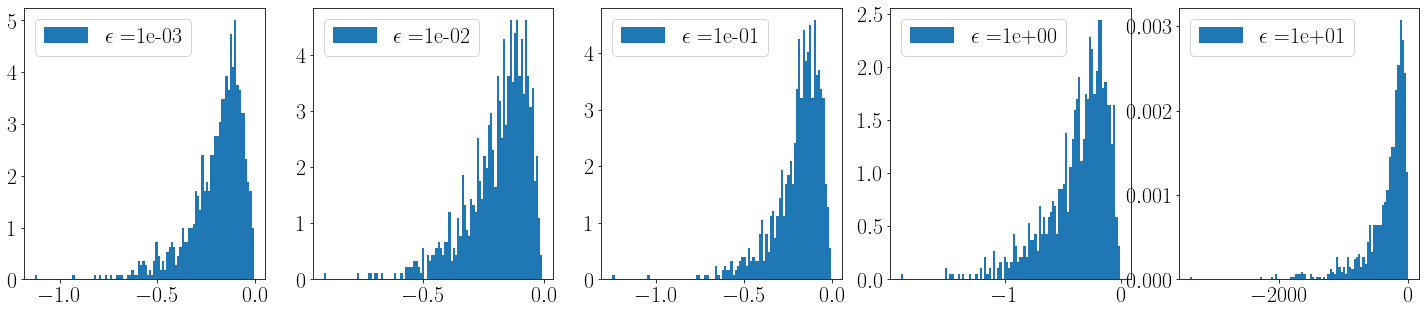

In [54]:
fig,ax = plt.subplots(1,5, figsize = (25,5))

for i, eps in enumerate(eps_vals):
    if i%100 == 0:
        lower_index = i*1000
        upper_index = (i+1)*1000
        ax[i//100].hist(SU_V[lower_index:upper_index],bins = 100, density= True, label = ( '$\epsilon =${:.0e}'.format(eps)))
        ax[i//100].legend()